# THE SPARK FOUNDATION
## TASK 2
### PREDICTION USING UNSUPERVISED MACHINE LEARNING
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

BY- DEEPIKA BHATT

In [1]:
# Setting working directory
import os
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Internship\\SPARK")

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#For K-mean Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Understanding Data

In [3]:
# Import Data
data_iris = pd.read_csv("iris.csv")

In [4]:
# View some sample records
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Shape of the Dataframe
data_iris.shape

(150, 6)

In [6]:
# checking data type of variables
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data_iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Visualization 

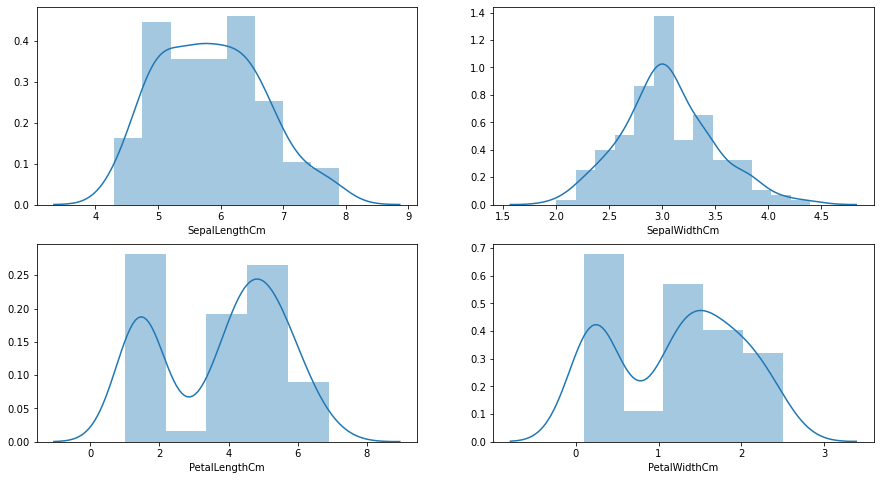

In [8]:
# Distribution plot of all the continious variables in the dataset
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.distplot(data_iris["SepalLengthCm"])

plt.subplot(2,2,2)
sns.distplot(data_iris["SepalWidthCm"])

plt.subplot(2,2,3)
sns.distplot(data_iris["PetalLengthCm"])

plt.subplot(2,2,4)
sns.distplot(data_iris["PetalWidthCm"])

#### Observation
- Variables -PetalLengthCm and PetalWidthCm have chance of internal grouping Therefore, for these variables we can do our further analysis.

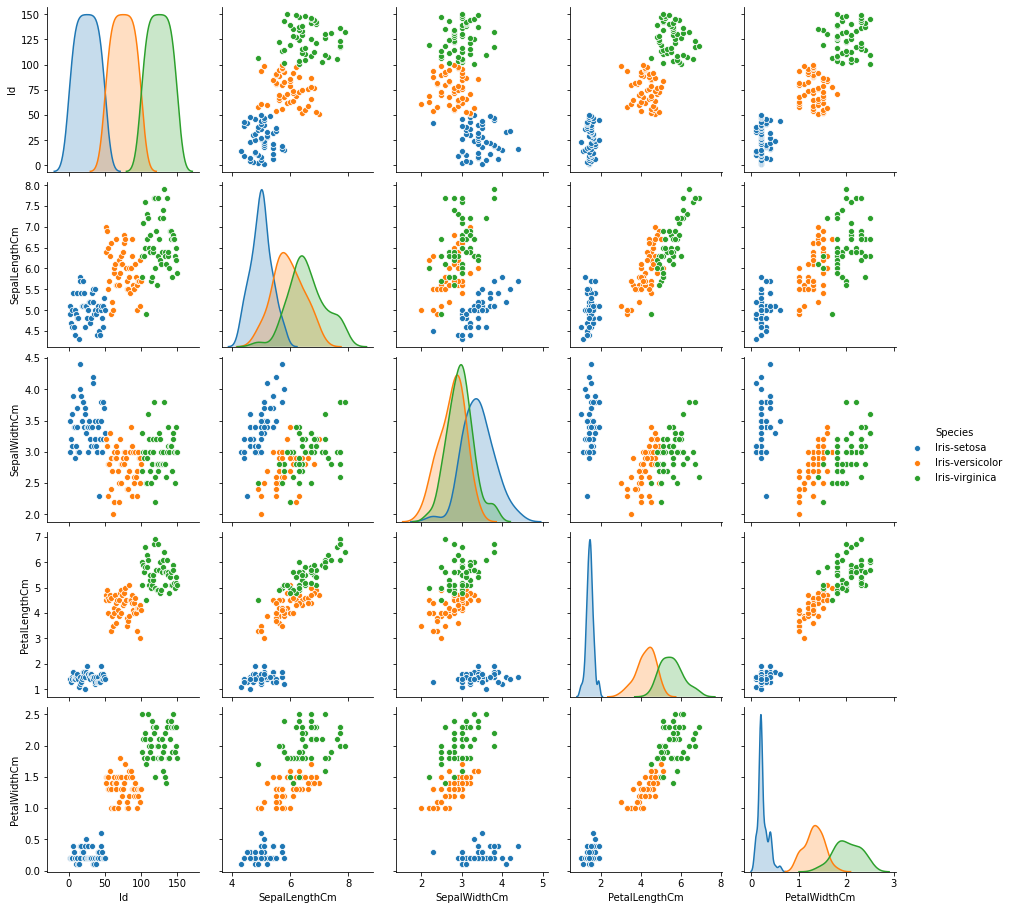

In [9]:
#pairplot of irirs dataset
sns.pairplot(data_iris, hue = "Species")
plt.show()

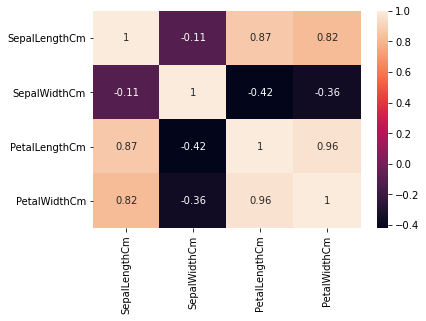

In [10]:
# correlation between characteristic
sns.heatmap(data_iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].corr(), annot = True)
plt.show()

# Outliers Treatment

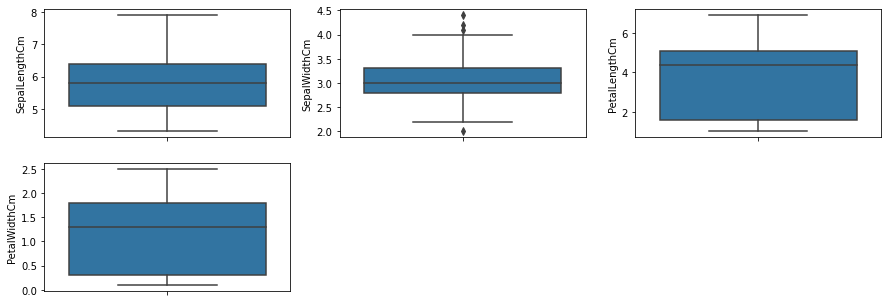

In [11]:
# Checking Outliers
plt.figure(figsize=(15,8))

plt.subplot(3,3,1)
sns.boxplot(y = data_iris["SepalLengthCm"])

plt.subplot(3,3,2)
sns.boxplot(y = data_iris["SepalWidthCm"])

plt.subplot(3,3,3)
sns.boxplot(y = data_iris["PetalLengthCm"])

plt.subplot(3,3,4)
sns.boxplot(y = data_iris["PetalWidthCm"])

plt.show()

In [12]:
# Soft capping (SepalWidthCm)
#Percentile value of SepalWidthCm
q1 = data_iris['SepalWidthCm'].quantile(0.01)
q4 = data_iris['SepalWidthCm'].quantile(0.99)
# capping lower range outliers
data_iris['SepalWidthCm'][data_iris['SepalWidthCm']<=q1] = q1
# Capping upper range outliers
data_iris['SepalWidthCm'][data_iris['SepalWidthCm']>=q4] = q4

In [13]:
# dropping the coulumns which are not required for the further analysis
data = data_iris.drop(["Id", "Species"], axis= 1).values

# Clustering - (Using K-mean Clustring)

In [14]:
#checking weather clustering is possible or not using Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

data_check_clustering = data_iris.drop(["Id", "Species"], axis = 1)
hopkins(data_check_clustering)

0.8435432717215765

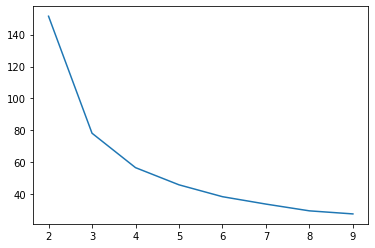

In [15]:
# finding optimal number of clusters using elbow
ssd = []
range_n = [2,3,4,5,6,7,8,9]
for i in range_n:
    kmeans = KMeans(n_clusters=i, max_iter= 500, random_state=50 )
    kmeans.fit(data)
    ssd.append([i, kmeans.inertia_])
ssd_dataframe = pd.DataFrame(ssd)
plt.plot(ssd_dataframe[0], ssd_dataframe[1])
plt.show()

In [16]:
#finding optimal clusters using sheloitte score
#Silhouette score measures that how a data point is similar to its own cluster as compared to the other clusters. 
range_n = [2,3,4,5,6,7]
ss = []
for i in range_n:
    kmeans = KMeans(n_clusters=i, max_iter=500)
    kmeans.fit(data)
    
    cluster_label = kmeans.labels_
    silhouette_average = silhouette_score(data, cluster_label)
    ss.append([i, silhouette_average])
    print("for n cluster {0} Silhouette score is {1}".format(i, silhouette_average))


for n cluster 2 Silhouette score is 0.6813827002308916
for n cluster 3 Silhouette score is 0.5535725524920355
for n cluster 4 Silhouette score is 0.4991092247792553
for n cluster 5 Silhouette score is 0.48982358704800866
for n cluster 6 Silhouette score is 0.3702142015220346
for n cluster 7 Silhouette score is 0.3530309840538689


In [17]:
Silhouette_score_df = pd.DataFrame(ss)
Silhouette_score_df.columns = ["Number of clusters", "Silhouette Score"]

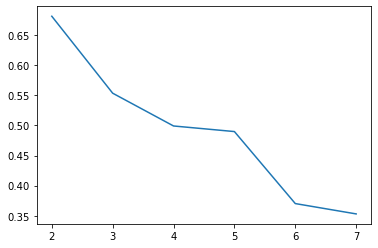

In [18]:
plt.plot(Silhouette_score_df["Number of clusters"], Silhouette_score_df["Silhouette Score"]);


#### Observation
- From elbow curve we can observe that at i = 3 there is a break point and from silhouette score we can observe that for n cluster = 3 we are getting second highest silhouette score value.Therefore, we will take k value as 3 (Never choose Silhoutte Score=2. It is wrong practical implication.)

In [19]:
# assuming k = 3
kmeans = KMeans(n_clusters= 3, max_iter= 500, random_state= 50)
Cluster_Id = kmeans.fit_predict(data)

In [20]:
Cluster_Id

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

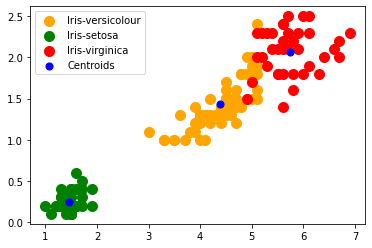

In [21]:
# Visualizing Cluster using petal length and petal width column
plt.scatter(data[Cluster_Id == 0, 2], data[Cluster_Id == 0, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data[Cluster_Id == 1, 2], data[Cluster_Id == 1, 3], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(data[Cluster_Id == 2, 2], data[Cluster_Id == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')

#centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 50, c = 'blue', label = 'Centroids')

plt.legend();